# Handwritten Digits Classification

## Overview

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. MNIST is like the "Hello World" of machine learning with which you can try out a few machine learning algorithms.

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning lighter. This pixel-value is an integer between 0 and 255, inclusive.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:
```
000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783 
```

## Get Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('Training data:', X_train.shape, y_train.shape) # training set
print('Test data:', X_test.shape, y_test.shape) # validation set

Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


60000 images with the shape of 28x28 (pixels) => we'll convert this into normal data (with rows and columns)

## EDA

In [ ]:
def plot_images(images, labels):
    '''Plot images with their labels. Ten each row'''
    plt.figure(figsize=(20, 10))
    columns = 10
    for i, image in enumerate(images):
        ax = plt.subplot(len(images) / columns + 1, columns, i + 1)
        ax.set_title(f"{labels[i]}", fontsize=16)
        plt.axis('off')
        plt.subplots_adjust(bottom=0.1)
        plt.imshow(image, cmap='gray')

def get_samples(n_samples, X, y):
    '''Get n_samples images randomly'''
    samples = np.random.choice(np.arange(len(y)), n_samples, replace=False)
    return X[samples], y[samples]

def get_digit(digit, n_samples, X, y):
    '''Get n_samples images of the class digit randomly'''
    y_digit = y[y == digit]
    samples = np.random.choice(np.arange(len(y_digit)), n_samples, replace=False)
    return X[y == digit][samples], y_digit[samples]

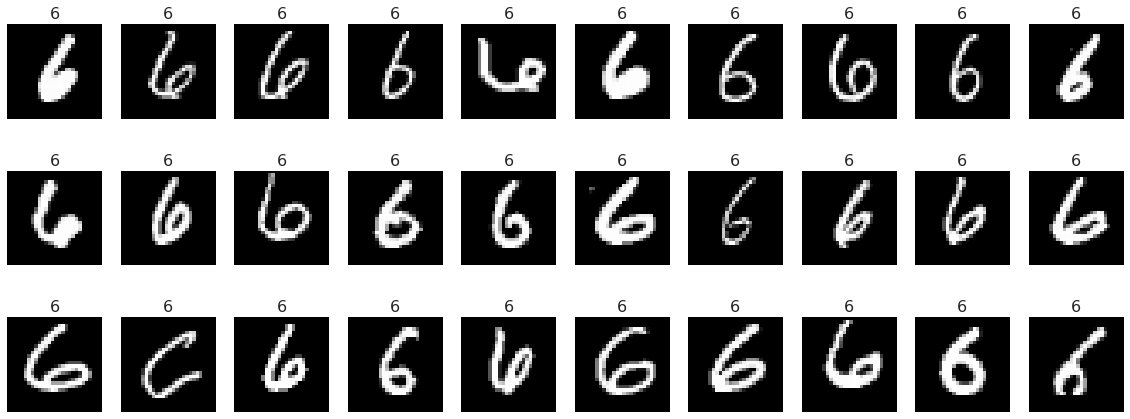

In [ ]:
n_samples = 30
# images, labels = get_samples(n_samples, X_train, y_train)
images, labels = get_digit(6, n_samples, X_train, y_train)
plot_images(images, labels)

**Plot the barplot of number of images of each class (0 to 9)**

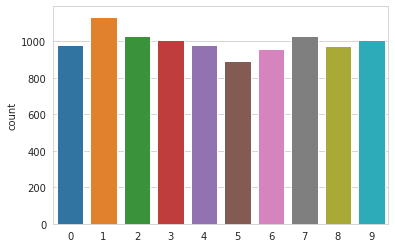

In [ ]:
# Your code here
sns.countplot(y_test)

**Print out the range of pixel values (min, max)**

In [ ]:
# Your code here
print('Pixel value range: ')

Pixel value range: 


## Transform data for training

**Get the first `n_samples` images randomly from training set and test set. Then reshape them into long vectors**

we get a small subset to test first as svc in sklearn is really slow

In [ ]:
n_samples = 2000
n_test_samples = 400
X_train_flat, y_train_flat = get_samples(n_samples, X_train, y_train)
X_test_flat, y_test_flat = get_samples(n_test_samples, X_test, y_test)
print(X_train_flat.shape,X_test_flat.shape)

# Normalization
X_train_flat = X_train_flat.reshape((n_samples, -1))/255
X_test_flat = X_test_flat.reshape((n_test_samples, -1))/255 #convert in to (0,1) range - as imgs have pixel of (0, 255) so we have to divide by 255

(2000, 28, 28) (400, 28, 28)


In [ ]:
print('Training data', X_train_flat.shape)
print('Test data', X_test_flat.shape)
#784 is 28*28, as we flatten dimension (change from 2d to vector) so we have to do that

Training data (2000, 784)
Test data (400, 784)


## Train models

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

**Train a SVM model**: Set up the training process and train with the small samples of data first before you take the full training dataset to train.

You can use GridSearch to find the best set of hyperparameters. Take a look at GridSearchCV from Sklearn here (look at the example at the end): https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
#we can use np.arange or np.linspace for C or alpha, gamma,...
# np.arange(0.001, 10, 0.1)

In [ ]:
# Your code here
parameters = {'kernel':['linear', 'rbf'], 'C':[0.001, 0.01, 0.1, 1, 10, 100], 'gamma':['auto', 'scale', 0.1, 0.01]}
gridsearch_models = GridSearchCV(SVC(), parameters, cv=5)

gridsearch_models.fit(X_train_flat, y_train_flat)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': ['auto', 'scale', 0.1, 0.01],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# print out the results
pd.DataFrame(gridsearch_models.cv_results_)

In [ ]:
print('Best params', gridsearch_models.best_params_)
print('Best score', gridsearch_models.best_score_)

Best params {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best score 0.9334999999999999


In [ ]:
best_model = gridsearch_models.best_estimator_

In [ ]:
best_model

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Get all the data
# Run it after you finish training with the 2000 samples
X_train_flat = X_train.reshape((-1, 784))
X_test_flat = X_test.reshape((-1, 784))
y_train_flat = y_train
y_test_flat = y_test

print('Training data', X_train_flat.shape)
print('Test data', X_test_flat.shape)
print('Training label', y_train_flat.shape)
print('Test label', y_test_flat.shape)

Training data (60000, 784)
Test data (10000, 784)
Training label (60000,)
Test label (10000,)


In [ ]:
clf = best_model.fit(X_train_flat, y_train_flat)
# # y_train_pred = clf.predict(X_train_flat)
# y_test_pred = clf.predict(X_test_flat)
# y_train_score = clf.score(y_train_flat, y_train_pred)
# y_test_score = clf.score(y_test_flat, y_test_pred)
# print(f'Score of train set: {y_train_score}\n\nScore of test set: {y_test_score}')

Best-model has already fitted on the dataset that you put in GridSearchCV, so no need to fit again

## Evaluation

**Get the predictions on test data**

In [ ]:
# Your code here
predictions = clf.predict(X_test_flat) # predictions on test set
print('Accuracy Score:', accuracy_score(y_test_flat, predictions))

Accuracy Score: 0.9837


**Plot the confusion matrix in form of a heatmap**

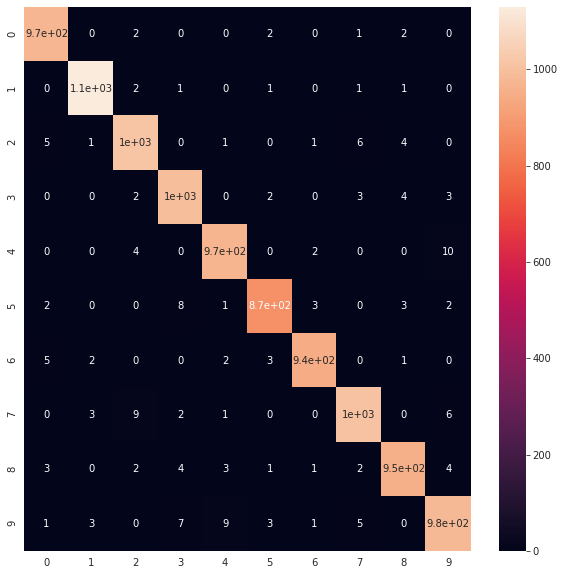

In [ ]:
# Your code here
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_flat, predictions)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)
plt.show()
# use sns.heatmap and sklearn's confusion_matrix

**Plot the samples that the model predicts incorrectly**

In [ ]:
incorrect

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,Actual,Prediction
247,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2
321,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,7
340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,3
381,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,7
445,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9779,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
9792,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,9
9808,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,220,39,0,0,0,0,0,0,0,0,0,0,0,0,0,9,4
9839,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,7


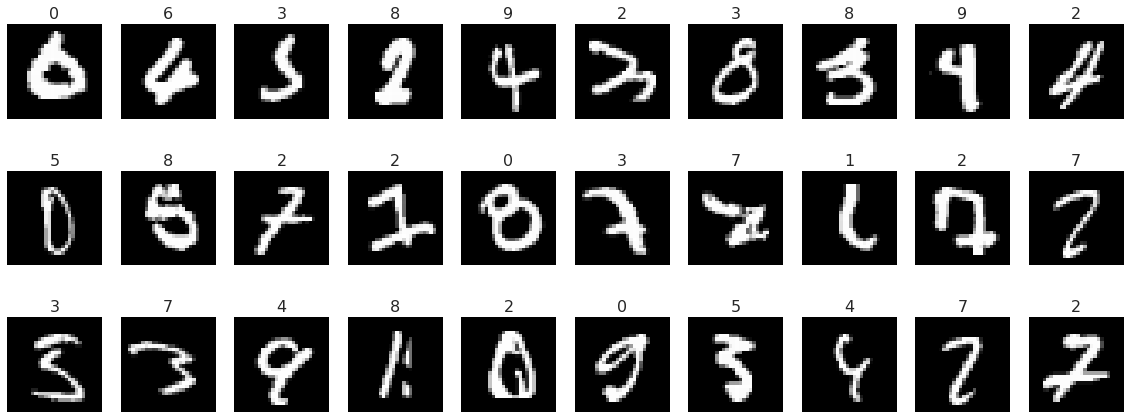

In [ ]:
# Your code here
df = pd.DataFrame(X_test_flat)
df['Actual'] = y_test_flat
df['Prediction'] = predictions
incorrect = df[df['Actual'] != df['Prediction']]
i = incorrect.sample(30).index
images = X_test[i, :, :]
labels = df['Prediction'].loc[i].values
plot_images(images, labels)

In [ ]:
labels

array([0, 6, 3, 8, 9, 2, 3, 8, 9, 2, 5, 8, 2, 2, 0, 3, 7, 1, 2, 7, 3, 7,
       4, 8, 2, 0, 5, 4, 7, 2], dtype=uint8)

## Save model

In [ ]:
import pickle

pickle.dump(clf, open('svm_mnist.pkl', 'wb'))

**Re-load model for testing**

In [ ]:
# Your code here
with open('svm_mnist.pkl', 'rb') as model:
    reload_model = pickle.load(model)

predictions = reload_model.predict(X_test_flat)
print(f'Accuracy score: {accuracy_score(y_test_flat, predictions)}')

Accuracy score: 0.9837
